In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Exploratory data analysis

In [9]:
a=df[(df['gender'] == 'Male') & (df['Churn']=='Yes')]
b=df[(df['gender'] == 'Female') & (df['Churn']=='Yes')]
c=df[(df['gender'] == 'Female') & (df['Churn']=='No')]
d=df[(df['gender'] == 'Male') & (df['Churn']=='No')]

In [10]:
print(f'{len(a)} male customrs has churned')
print(f'{len(b)} female customrs has churned')
print(f'{len(c)} female customrs has not churned')
print(f'{len(d)} male customrs has not churned')

930 male customrs has churned
939 female customrs has churned
2549 female customrs has not churned
2625 male customrs has not churned


male senior citizens whose Payment Method is Electronic check & 
store the result in ‘senior_male_electronic’


In [11]:
senior_male_electronic=df[(df['SeniorCitizen'])& (df['gender'] == 'Male')
                           & (df['PaymentMethod'] == 'Electronic check')]
print(f'{len(senior_male_electronic)} no. of senior citizen use electronic_check for payment method') 

298 no. of senior citizen use electronic_check for payment method


customers whose tenure is greater than 70 months or their 
Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

In [12]:
customer_total_tenure=df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
customer_total_tenure.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

In [13]:
two_mail_yes= df[(df['Contract'] == 'Two year')&(df['PaymentMethod']=='Mailed check')
                 &(df['Churn']=='Yes')]
two_mail_yes.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes


count of different levels from the 'churn' column

<AxesSubplot:>

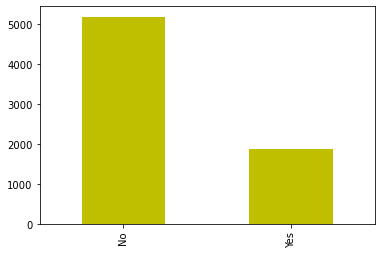

In [14]:
df['Churn'].value_counts().plot(kind='bar',color='y')

Text(0.5, 1.0, 'Distribution of Internet Service')

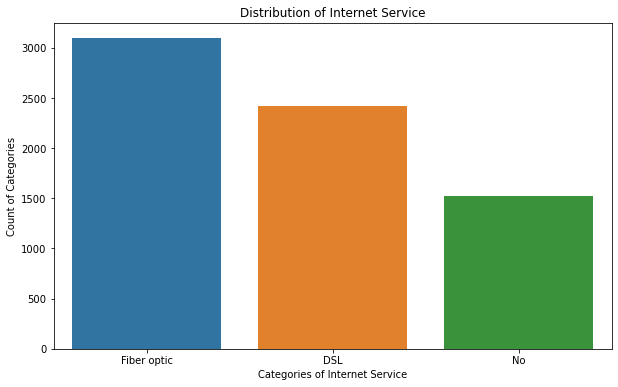

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['InternetService'].value_counts().keys().tolist(),y=df['InternetService'].value_counts().tolist())
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

Text(0.5, 1.0, 'Distribution of tenure')

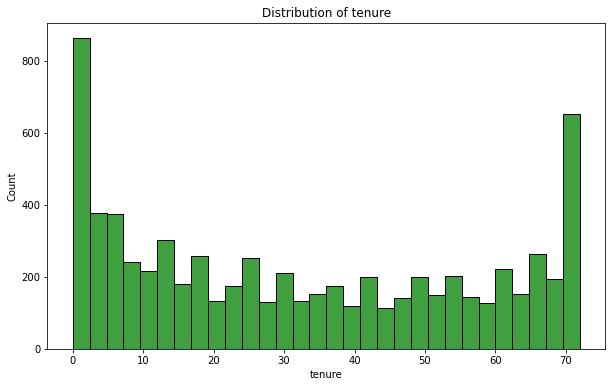

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['tenure'],color='green',bins=30)
plt.title('Distribution of tenure')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

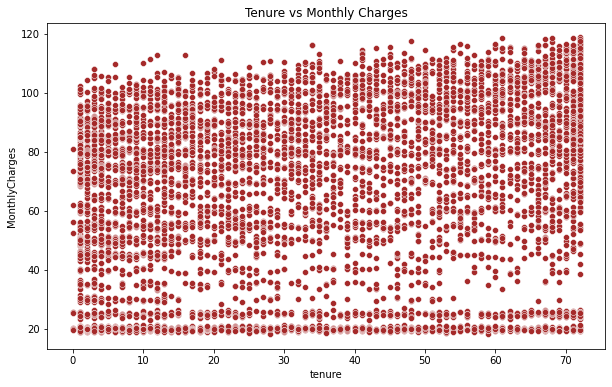

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='MonthlyCharges',x='tenure',data=df,color='brown')
plt.title('Tenure vs Monthly Charges')

# Data preprocessing

In [18]:
df.drop(columns='customerID',axis=1,inplace=True)

In [19]:
cat_variables = df.select_dtypes('O')

In [20]:
cat_variables.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [21]:
cat_variables.drop(columns='TotalCharges',axis= 1,inplace=True)

In [22]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = "coerce")

In [23]:
df['TotalCharges'].isnull().sum()

11

In [24]:
cat_variables.drop(columns='Churn',axis= 1,inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
for i in cat_variables:
    cat_variables[i] = le.fit_transform(cat_variables[i])
    

In [28]:
cat_variables.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [29]:
numerical_col = df.select_dtypes(['float64','int64'])

In [30]:
numerical_col.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [31]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0}) 

In [32]:
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [33]:
new_df= pd.concat([cat_variables,numerical_col,df['Churn']],axis=1)

In [34]:
new_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,108.15,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,70.70,151.65,1


In [35]:
new_df.dropna(axis=0,inplace=True)
new_df.isnull().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
SeniorCitizen       0
tenure              0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.99627361, -0.96660184, -0.65008462, ...,  0.7579869 ,
        -1.33156208, -0.44869885],
       [-1.00374033, -0.96660184, -0.65008462, ..., -0.2167255 ,
         0.43767123, -0.06341975],
       [ 0.99627361, -0.96660184, -0.65008462, ...,  0.92043897,
         1.12968991,  1.47023156],
       ...,
       [ 0.99627361, -0.96660184,  1.53826128, ..., -1.1914379 ,
        -1.49664606, -0.97070623],
       [ 0.99627361,  1.03455214, -0.65008462, ...,  0.79859992,
        -0.83464264, -0.11389184],
       [-1.00374033, -0.96660184, -0.65008462, ..., -1.27266393,
        -1.51665624, -0.99536973]])

# Model Building

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr =LogisticRegression()

In [47]:
lr.fit(X_train,y_train)

C:\Users\sachi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_pred=lr.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [50]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[932 173]
 [114 188]]
0.7960199004975125


## DecisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier  

In [53]:
Dt = DecisionTreeClassifier()

In [54]:
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred=Dt.predict(X_test)

In [58]:
print(f'confusion_matrix :{confusion_matrix(y_test, y_pred)}')   
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}') 

confusion_matrix :[[828 218]
 [177 184]]
accuracy_score : 0.7192608386638237


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
RF = RandomForestClassifier(n_estimators = 100)

In [61]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
y_pred= RF.predict(X_test)

In [63]:
print(f'accuracy_score : {accuracy_score(y_test, y_pred)}')

accuracy_score : 0.7896233120113717


## Hyperparameter Tuning using Grid_Search_Cv

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
params = {'n_estimators':[25,50,100,200],
         'max_depth':[3,7,13,20],
         'max_features':['sqrt','log2',None],
         'max_leaf_nodes':[3,6,9],}

In [69]:
grid_search = GridSearchCV(RandomForestClassifier(),
                          param_grid = params)

In [70]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 7, 13, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 200]})

In [71]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=20, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)


In [72]:
model = RandomForestClassifier(max_depth=20, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)

In [79]:
y_pred_rand = model.predict(X_test)

In [83]:
print(f'accuracy_score : {accuracy_score(y_test, y_pred_rand)}')

accuracy_score : 0.7953091684434968


In [84]:
print(classification_report(y_test, y_pred_rand))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1046
           1       0.69      0.37      0.48       361

    accuracy                           0.80      1407
   macro avg       0.75      0.66      0.68      1407
weighted avg       0.78      0.80      0.77      1407

